## Assignment 2
##### Mia Miletic (63240481)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#### Data preprocessing

In [2]:
headers = [
    "state", "county", "community", "communityname", "fold", "population", "householdsize",
    "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", 
    "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome", 
    "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", 
    "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", 
    "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", 
    "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", 
    "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", 
    "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", 
    "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", 
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", 
    "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", 
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", 
    "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", 
    "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", 
    "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", 
    "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", 
    "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc", 
    "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", 
    "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85", 
    "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps", 
    "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", 
    "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", 
    "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", 
    "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", 
    "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", 
    "PolicBudgPerPop", "ViolentCrimesPerPop"
]

df = pd.read_csv('communities.data', header=None, names=headers, na_values="?")

# Drop the first 5 columns
df = df.iloc[:, 5:]

# Set threshold for "mostly NA" columns (e.g., 80% NA)
threshold = 0.8 * len(df)

# Drop columns exceeding the threshold
na_cols = df.columns[df.isna().sum() > threshold]
df = df.drop(columns=na_cols)

# Convert all columns in the to numeric and take care of remaining NA values
df = df.apply(pd.to_numeric)
df.fillna(df.mean(), inplace=True)
df.head(5)

# Save the cleaned dataset
df.to_csv('cleaned_data.csv', index=False)

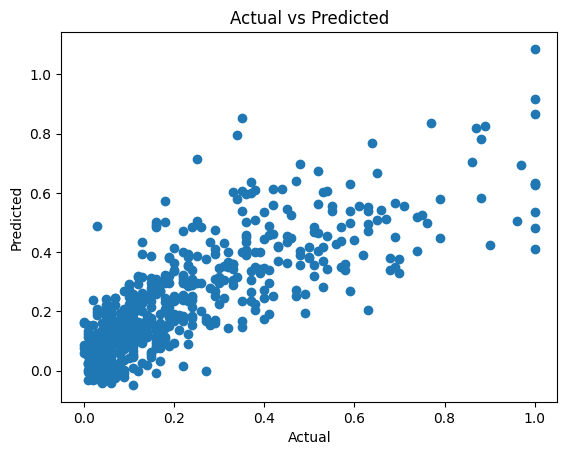

In [3]:
#set up for linear regression
df = pd.read_csv('cleaned_data.csv')

#target variable is ViolentCrimesPerPop
X = df.drop(columns=['ViolentCrimesPerPop'])
y = df['ViolentCrimesPerPop']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# visualize the results

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#### K-fold cross validation - Custom implementation

Splitting the data into folds

In [4]:
#setting up the indices for k-fold
def kfold_indices(data, k):
    fold_size = len(data) // k #divide the data into k folds
    indices = np.arange(len(data))
    folds = [] #array to store the indices for each fold
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

Performing K-Fold Cross-Validation

In [5]:
def cross_validation(X,y,k):
    fold_indices = kfold_indices(X, k) #folded for 5-fold cross validation
    model = LinearRegression()
    kfcv_scores = []
    for train_indices, test_indices in fold_indices:
        X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
        X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        fold_score = mean_squared_error(y_test, y_pred)
        kfcv_scores.append(fold_score) #add the fold score to the list of scores
    return kfcv_scores

kfcv_scores = cross_validation(X, y, 5)
kfcv_mean_mse = np.mean(kfcv_scores) # Calculate the mean MSE across all folds
print("K-Fold Cross-Validation MSE Scores:", kfcv_scores)
print("Mean MSE:", kfcv_mean_mse)

K-Fold Cross-Validation MSE Scores: [0.020294308585514502, 0.023641211795090142, 0.01640269056819688, 0.016191681610671648, 0.018187421234256075]
Mean MSE: 0.01894346275874585


#### K-fold cross validation - Sklearn implementation (for comparison)

In [6]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
sklearn_kfcv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print('K-fold cross validation MSE (Sklearn):', -sklearn_kfcv_scores.mean())
print('K-fold cross validation MSE (Custom):', kfcv_mean_mse)
print('Difference:', -sklearn_kfcv_scores.mean() - kfcv_mean_mse)


K-fold cross validation MSE (Sklearn): 0.01895946931936567
K-fold cross validation MSE (Custom): 0.01894346275874585
Difference: 1.6006560619820365e-05


#### Leave one out cross validation - Custom implemenation

In [7]:
def leave_one_out_cross_validation(X, y):
    loocv_scores = []
    model = LinearRegression()
    for i in range(len(X)):
        # Split the data into training and test sets 1:n-1
        X_train = X.drop(i)
        y_train = y.drop(i)
        X_test = X.iloc[[i]]
        y_test = y.iloc[[i]]

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # MSE for the test set and append it
        loocv_score = mean_squared_error(y_test, y_pred)
        loocv_scores.append(loocv_score)
    return loocv_scores

loocv_scores = leave_one_out_cross_validation(X, y)
# Calculate MSE all iterations
mean_loocv_score = np.mean(loocv_scores)
print('LOOCV MSE:', mean_loocv_score)

LOOCV MSE: 0.01852320616831318


#### Leave one out cross validation - Sklearn implemenation (for comparison)

In [8]:
from sklearn.model_selection import LeaveOneOut

sklearn_loocv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=LeaveOneOut(), n_jobs=-1)
print('LOOCV MSE (Sklearn):', -sklearn_loocv_scores.mean())
print('LOOCV MSE (Custom):', mean_loocv_score)
print('Difference:', -sklearn_loocv_scores.mean() - mean_loocv_score)

LOOCV MSE (Sklearn): 0.01852320616831318
LOOCV MSE (Custom): 0.01852320616831318
Difference: 0.0


#### Forward attribute selection


In [9]:
def forward_attribute_selection(X, y, k=5, threshold_factor=0.9999):
    selected_attr = []
    remaining_attr = set(X.columns)
    best_score = float('inf')

    for step in range(len(remaining_attr)):
        # Evaluate each feature and its score
        scores=[]
        attributes=[]
        for feature in remaining_attr:
            scores.append(np.mean(cross_validation(X[selected_attr + [feature]], y, k)))
            attributes.append(feature)
        
        new_best, best_attr = min(zip(scores, attributes)) # Find the best attribute
  
        # Add feature if it improves the score per threshold
        if new_best < best_score * threshold_factor:
            selected_attr.append(best_attr)
            remaining_attr.remove(best_attr)
            best_score = new_best
            print(f"Step {step+1}: Selected '{best_attr}' with MSE: {best_score}")
        else:
            print(f"Selection stopped: No sufficient improvement (Threshold: {threshold_factor}). \nBest MSE: {best_score}")
            break  

    return selected_attr


Forward attribute selection on our df

In [10]:
# Shuffle and split data
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

# Separate attr (ViolentCrimesPerPop is target)
X_train = train_data.drop(columns=['ViolentCrimesPerPop'])
y_train = train_data['ViolentCrimesPerPop']

# Call forward_attribute_selection with the training data
selected_attributes = forward_attribute_selection(X_train, y_train, k=5)
print("Selected Features:", selected_attributes)


Step 1: Selected 'PctKids2Par' with MSE: 0.025802460410716637
Step 2: Selected 'racePctWhite' with MSE: 0.023035230676573988
Step 3: Selected 'HousVacant' with MSE: 0.021421129754273856
Step 4: Selected 'pctUrban' with MSE: 0.021058776256545952
Step 5: Selected 'NumStreet' with MSE: 0.020785498685811737
Step 6: Selected 'numbUrban' with MSE: 0.020490736749807545
Step 7: Selected 'PctWorkMom' with MSE: 0.020305586702175298
Step 8: Selected 'MalePctDivorce' with MSE: 0.02004273240492288
Step 9: Selected 'PctIlleg' with MSE: 0.01969346606972718
Step 10: Selected 'MedOwnCostPctIncNoMtg' with MSE: 0.019592218311972706
Step 11: Selected 'PctHousOccup' with MSE: 0.0195528138351641
Step 12: Selected 'racepctblack' with MSE: 0.019517606774775247
Step 13: Selected 'PctPersDenseHous' with MSE: 0.019386793427974412
Step 14: Selected 'AsianPerCap' with MSE: 0.019340987752039684
Step 15: Selected 'MedRentPctHousInc' with MSE: 0.01929712050506608
Step 16: Selected 'agePct12t29' with MSE: 0.0192833588

Compare tests using complete df and only with our selected attributes

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# List of models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Test each model with all features
print("Testing models with all features:")
results_all_features = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results_all_features[model_name] = mse
    print(f"{model_name} MSE with all features: {mse}")

# Test each model with selected features
print("\nTesting models with selected features:")
results_selected_features = {}
for model_name, model in models.items():
    model.fit(X_train[selected_attributes], y_train)
    y_pred = model.predict(X_test[selected_attributes])
    mse_selected = mean_squared_error(y_test, y_pred)
    results_selected_features[model_name] = mse_selected
    print(f"{model_name} MSE with selected features: {mse_selected}")

# Compare MSE before and after feature selection for each model
print("\nMSE Improvement with Feature Selection:")
for model_name in models:
    mse_all = results_all_features[model_name]
    mse_selected = results_selected_features[model_name]
    improvement = mse_all - mse_selected
    print(f"{model_name}: MSE improvement = {improvement}")


Testing models with all features:
Linear Regression MSE with all features: 0.01752835271712926
Ridge Regression MSE with all features: 0.017525912823031863
Lasso Regression MSE with all features: 0.0484355487070418

Testing models with selected features:
Linear Regression MSE with selected features: 0.017288210026327154
Ridge Regression MSE with selected features: 0.01706570443037993
Lasso Regression MSE with selected features: 0.0484355487070418

MSE Improvement with Feature Selection:
Linear Regression: MSE improvement = 0.00024014269080210524
Ridge Regression: MSE improvement = 0.00046020839265193195
Lasso Regression: MSE improvement = 0.0


#### Bootstrap method

In [12]:
from sklearn.utils import resample

In [13]:
num_bootstrap_samples = 1000 # Number of bootstrap samples
model = LinearRegression() 

#Set train and test based on selected attributes
X_train = train_data[selected_attributes]
y_train = train_data['ViolentCrimesPerPop']
X_test = test_data[selected_attributes]
y_test = test_data['ViolentCrimesPerPop']

mse_list = []

for _ in range(num_bootstrap_samples):
    X_bootstrap, y_bootstrap = resample(X_train, y_train, replace=True)    

    model.fit(X_bootstrap, y_bootstrap)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

mse_interval = np.percentile(mse_list, [2.5, 97.5])
mean_mse = np.mean(mse_list)
(lci, uci) = mse_interval

print("Mean of MSE for each linear model:", mean_mse)
print("95% Confidence Interval for MSE:", mse_interval)
# print(mse_list)

Mean of MSE for each linear model: 0.017882149130460108
95% Confidence Interval for MSE: [0.0169712  0.01895408]


Histogram of MSE values from bootstrap samples

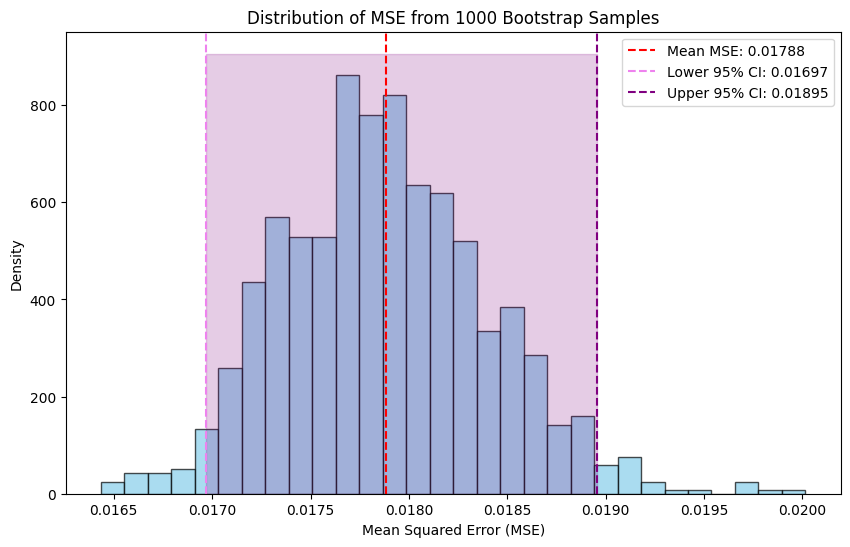

In [14]:
# Plot the histogram of MSE values from bootstrap samples
plt.figure(figsize=(10, 6))
plt.hist(mse_list, bins=30, color='skyblue', edgecolor='black', density=True, alpha=0.7)
plt.axvline(mean_mse, color='red', linestyle='--', label=f'Mean MSE: {mean_mse:.5f}')

# Mark the 95% confidence interval
plt.axvline(lci, color='violet', linestyle='--', label=f'Lower 95% CI: {lci:.5f}')
plt.axvline(uci, color='purple', linestyle='--', label=f'Upper 95% CI: {uci:.5f}')
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=lci, x2=uci, color='purple', alpha=0.2)

plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Density')
plt.title(f'Distribution of MSE from {num_bootstrap_samples} Bootstrap Samples')
plt.legend()

plt.show()
